In [1]:
import numpy as np

# 오차제곱합

In [20]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0,   0,    1,   0,   0,    0,   0,   0,   0,   0]

In [21]:
# cost = 0
# for idx1 in range(len(y)):
#     cost += (y[idx1] - t[idx1])**2
    
# cost * 0.5

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [22]:
sum_squares_error(np.array(y), np.array(t))
    

0.09750000000000003

# binary cross entropy
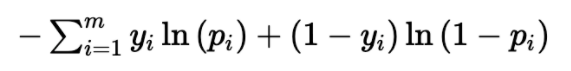

In [23]:
def cross_entropy(Y, p):
    Y = np.float_(Y)
    p = np.float_(p)
    
    return -np.sum(Y*np.log(p) + (1 - Y)*np.log(1 - p)).round(2)

In [24]:
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

for p, y in zip(P, Y):
    print(cross_entropy(y, p))

4.78
1.2


In [25]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [26]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [27]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [28]:
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], 
     [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]]
t = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] 

In [29]:
def cross_entropy_error(y, t):
    if y.ndim == 1:        
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))/batch_size

In [30]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [31]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

# 미분

In [32]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x))/h

In [33]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h))/(2*h)

In [34]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1*x

In [35]:
numerical_diff(function_1, 5)

0.1999999999990898

In [36]:
numerical_diff(function_1, 5)

0.1999999999990898

In [37]:
import matplotlib.pylab as plt

In [38]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

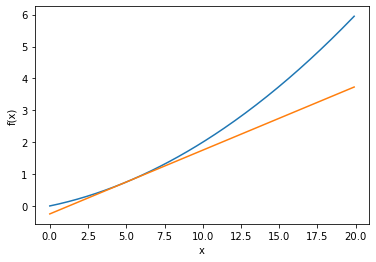

In [39]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 편미분
$f(x_0, x_1) = x_0^2 + x_1^2$

In [40]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [41]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        
        #f(x+h) - f(x-h)/2h
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
        
    return grad
        
        

In [42]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

# Gradient Descent

In [43]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr*grad
        
    return x, np.array(x_history)

In [44]:
init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

In [45]:
x

array([-6.11110793e-10,  8.14814391e-10])

In [46]:
x_history

array([[-3.00000000e+00,  4.00000000e+00],
       [-2.40000000e+00,  3.20000000e+00],
       [-1.92000000e+00,  2.56000000e+00],
       [-1.53600000e+00,  2.04800000e+00],
       [-1.22880000e+00,  1.63840000e+00],
       [-9.83040000e-01,  1.31072000e+00],
       [-7.86432000e-01,  1.04857600e+00],
       [-6.29145600e-01,  8.38860800e-01],
       [-5.03316480e-01,  6.71088640e-01],
       [-4.02653184e-01,  5.36870912e-01],
       [-3.22122547e-01,  4.29496730e-01],
       [-2.57698038e-01,  3.43597384e-01],
       [-2.06158430e-01,  2.74877907e-01],
       [-1.64926744e-01,  2.19902326e-01],
       [-1.31941395e-01,  1.75921860e-01],
       [-1.05553116e-01,  1.40737488e-01],
       [-8.44424930e-02,  1.12589991e-01],
       [-6.75539944e-02,  9.00719925e-02],
       [-5.40431955e-02,  7.20575940e-02],
       [-4.32345564e-02,  5.76460752e-02],
       [-3.45876451e-02,  4.61168602e-02],
       [-2.76701161e-02,  3.68934881e-02],
       [-2.21360929e-02,  2.95147905e-02],
       [-1.

In [47]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10, step_num=step_num)
x

array([-2.58983747e+13, -1.29524862e+12])

In [48]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-5, step_num=step_num)
x

array([-2.99400594,  3.99200791])

# 단층 신경망

In [10]:
class Person:

    
    def __init__(self):
        self.name = ""
        self.hobby = ""
        print("초기화")
    
    def do(self, action):
        print(action)


person1 = Person()
person1.name = "경철"
person1.hobby = "독서"
person1.do("요리")

person2 = Person()
person2.name = "정현"
person2.hobby = "영화"
person2.do("코딩")



초기화
요리
초기화
코딩


In [11]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x, axis=-1).reshape(-1, 1)
    y = exp_x/sum_exp_x
    return y



In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    delta = 1e-7
    return -np.sum(np.log(y + delta))/batch_size

In [13]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [14]:
net = simpleNet()
net.W

array([[-1.19733537,  0.49835759, -0.07323579],
       [ 0.35077495,  0.39744134, -0.42463688]])

In [15]:
x = np.array([0.6, 0.9])

In [16]:
p = net.predict(x)
p

array([-0.40270377,  0.65671176, -0.42611466])

In [17]:
np.argmax(p)

1

In [18]:
t = np.array([0, 0, 1])
net.loss(x, t)

3.70806338659229

In [19]:
t = np.array([0, 1, 0])
net.loss(x, t)

3.70806338659229

In [20]:
t = np.array([1, 0, 0])
net.loss(x, t)

3.70806338659229

In [21]:
batch_size = 5
np.arange(batch_size)

array([0, 1, 2, 3, 4])

In [22]:
def numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad
        

In [23]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)
            
        return grad

In [24]:
def f(W):
    return net.loss(x, t)

dw = numerical_gradient(f, net.W)
dw

array([[-0.22974722,  0.4680617 , -0.23831448],
       [-0.34462083,  0.70209256, -0.35747172]])

In [25]:
dw = numerical_gradient(lambda w: net.loss(x, t), net.W)

In [26]:
net.W

array([[-1.19733537,  0.49835759, -0.07323579],
       [ 0.35077495,  0.39744134, -0.42463688]])

In [27]:
net.W -= 0.01 * dw
net.W

array([[-1.1950379 ,  0.49367698, -0.07085265],
       [ 0.35422116,  0.39042041, -0.42106216]])

In [28]:
p = net.predict(x)
p

array([-0.3982237 ,  0.64758456, -0.42146753])

In [29]:
np.argmax(p)

1

In [30]:
t = np.array([1, 0, 0])
net.loss(x, t)

3.6974498482974716

# 2층 신경망 클래스 구현

In [31]:
import pickle

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

In [32]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [33]:
def cross_entropy_error(y, t, is_onehot=True):
    # y = prediction array, t = real target array
    # t(target array)가 one-hot인지 아닌지를 인수로 입력받아, 다르게 return합니다.
    # 아무것도 입력하지 않으면(default), is_onehot = True
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    delta = 1e-7
    
    if is_onehot:
        # onehot이라면, 실제 target array인 t는 실제 라벨을 제외한 나머지 컬럼이 0인 상태
        # np.log(y+delta)와 onehot 상태의 target array를 곱하면 
        # np.log(y+delta)에 대하여 각각의 label에 해당하는 확률만 남게 됨
        return -np.sum(t * np.log(y + delta))/batch_size
    else:
        # onehot이 아니라면, 실제 target array인 t는 각각의 label(0, 1, 2, 3, ..)이 입력된 상태
        # 각각의 label을 prediction array인 t의 column을 인덱싱하는 데 사용하여,
        # 실제 label에 대한 prediction 확률만을 가져올 수 있음.
        # column index가 t 위치에 있는 prediction 값들을 자연로그 해준 뒤 delta 더해서 총합을 구함   
        print((-np.sum(np.log(y[:, t] + delta)) == -np.sum(np.log(y[np.arange(batch_size), t] + delta))).all())
        return -np.sum(np.log(y[:, t] + delta))/batch_size
        #return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size

In [34]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        # target array 고유값 어레이 == [0., 1.] -> one-hot encoded
        # target array 고유값 어레이 != [0., 1.] -> NONE one-hot encoded
        onehot = np.array(np.unique(t) == np.array([0., 1.])).all()
        y = self.predict(x)
        return cross_entropy_error(y, t, is_onehot=onehot)

    def accuracy(self, x, t):       
        y = self.predict(x)
        # 예측값 어레이는 각 라벨에 대한 확률들
        y = np.argmax(y, axis=1)
        # argmax를 통해 None one-hot encoded 형태로 변환한다.
        
#         # target array 고유값 어레이(np.unique()) == [0., 1.] -> one-hot encoded
#         # target array 고유값 어레이(np.unique()) != [0., 1.] -> NONE one-hot encoded
#         onehot = np.array(np.unique(t) == np.array([0., 1.])).all()
#         if onehot:
#             t = np.argmax(np.array(t), axis=1)
#         else:
#         # onehot이 아니라면, 기본적으로 t = [1, 6, 8, 3, 2, ...] 형태의 1차원을 기본으로 가정 (변환 필요 없음.)
#         # 그러나 2차원 이상이라면 np.argmax(t, axis=1)를 적용해서 1차원 none one-hot target array로 변환.
#             if t.ndim > 1:
#                 t = np.argmax(t, axis=1)            
        if t.ndim > 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [35]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [36]:
print(network.params['W1'].shape)
print(network.params['b1'].shape)
print(network.params['W2'].shape)
print(network.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [37]:
x = np.random.rand(50, 784)
y = network.predict(x)

In [38]:
y[0]

array([0.09690595, 0.10324742, 0.10023158, 0.10638186, 0.09679564,
       0.10009237, 0.10145913, 0.0993188 , 0.09440735, 0.1011599 ])

In [39]:
np.argmax(y[0])

3

# Learning from One-Hot-Encoded target

In [44]:
# one-hot encoded
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, 
                                                  one_hot_label=True)

# target(y) = 2차원 어레이, one-hot encoded
print(t_train, t_train.ndim)

iter_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] 2


In [45]:
for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    # t(target array) 고유값을 조사 > one-hot encoded 상태 확인
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"{i} / train acc:{train_acc} / test acc:{test_acc}")
    
    # 테스트 목적, i == 3에서 루프 종료
    # assert i==3, "테스트 완료"

0 / train acc:0.10218333333333333 / test acc:0.101
1 / train acc:0.10218333333333333 / test acc:0.101
2 / train acc:0.10218333333333333 / test acc:0.101
3 / train acc:0.10218333333333333 / test acc:0.101
4 / train acc:0.09736666666666667 / test acc:0.0982


KeyboardInterrupt: 

# Learning from None One-hot-encoded target

In [296]:
# none one-hot encoded
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, 
                                                  one_hot_label=False)

# tartget(y) = 1차원 어레이
print(t_train, t_train.ndim)

iter_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), 1)

In [297]:
for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    # t(target array) 고유값을 조사 > None one-hot encoded 상태 확인
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"train acc:{train_acc} / test acc:{test_acc}")
        
    # 테스트 목적, i == 3에서 루프 종료
    #assert i==3, "테스트 완료"

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


train acc:0.11236666666666667 / test acc:0.1135
train acc:0.09915 / test acc:0.1009
train acc:0.10441666666666667 / test acc:0.1028
train acc:0.09871666666666666 / test acc:0.098
train acc:0.09863333333333334 / test acc:0.0958
train acc:0.09863333333333334 / test acc:0.0958
train acc:0.09035 / test acc:0.0892


KeyboardInterrupt: 